Importing all the required libraries

In [93]:
import os
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
import math
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Knowing the working directory

In [2]:
os.getcwd()

'C:\\Users\\Harish'

Changing the working directory

In [94]:
os.chdir("C:\\Users\Harish\Desktop\Projects")

Confirming the working direcory

In [95]:
os.getcwd()

'C:\\Users\\Harish\\Desktop\\Projects'

Importing the data file

In [96]:
ddata = pd.read_csv("day.csv")

Knowing the summary of the data

In [97]:
ddata.shape

(731, 16)

In [98]:
ddata.head(4)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562


Knowing the data types of the data set

In [99]:
ddata.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Looking for any missing values in the data

In [100]:
Missing_val = pd.DataFrame(ddata.isnull().sum())
print(Missing_val)

            0
instant     0
dteday      0
season      0
yr          0
mnth        0
holiday     0
weekday     0
workingday  0
weathersit  0
temp        0
atemp       0
hum         0
windspeed   0
casual      0
registered  0
cnt         0


Checking for Outliers in the data by using boxplots

[Text(0,0.5,'Count'),
 Text(0.5,0,'Humidity'),
 Text(0.5,1,'Box Plot On Count Across Humidity')]

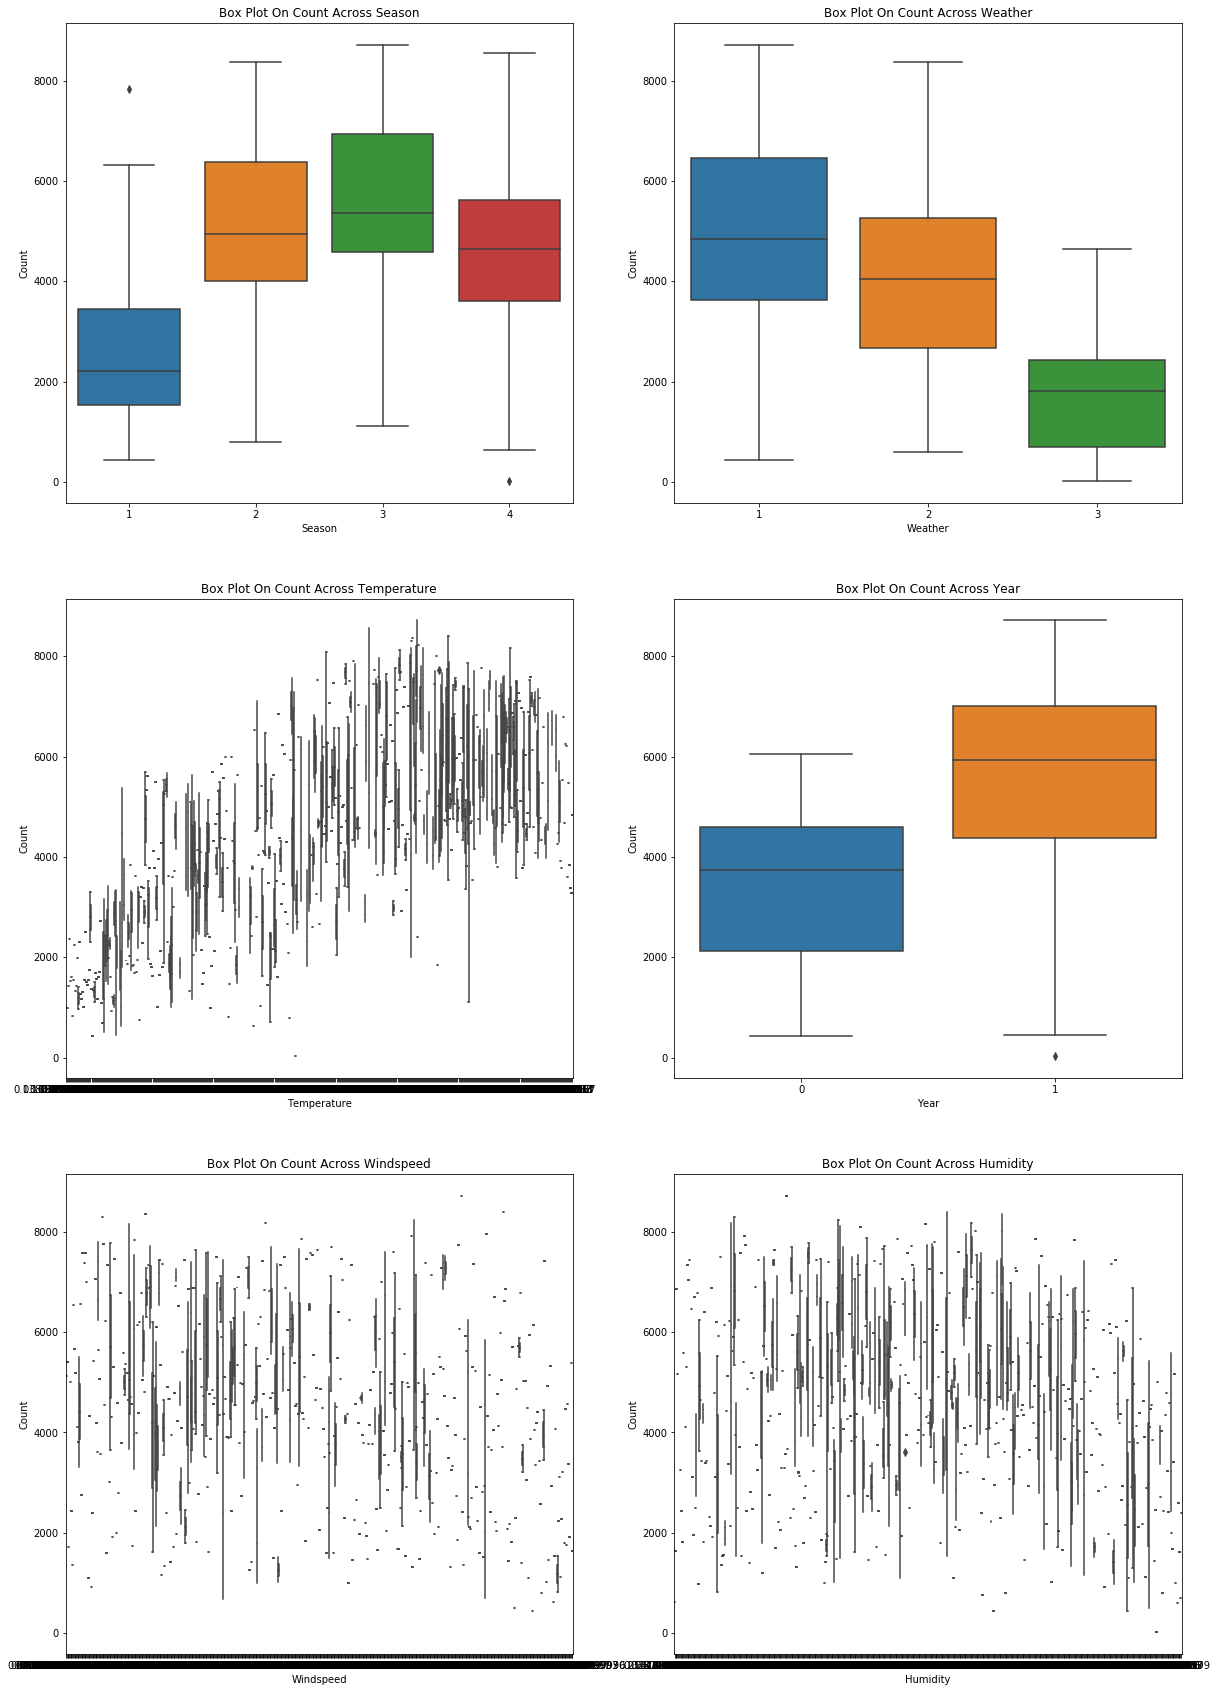

In [16]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(20, 30)
sn.boxplot(data=ddata,y="cnt",x="season",orient="v",ax=axes[0][0])
sn.boxplot(data=ddata,y="cnt",x="weathersit",orient="v",ax=axes[0][1])
sn.boxplot(data=ddata,y="cnt",x="temp",orient="v",ax=axes[1][0])
sn.boxplot(data=ddata,y="cnt",x="yr",orient="v",ax=axes[1][1])
sn.boxplot(data=ddata,y="cnt",x="windspeed",orient="v",ax=axes[2][0])
sn.boxplot(data=ddata,y="cnt",x="hum",orient="v",ax=axes[2][1])

axes[0][0].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[0][1].set(xlabel='Weather', ylabel='Count',title="Box Plot On Count Across Weather")
axes[1][0].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")
axes[1][1].set(xlabel='Year', ylabel='Count',title="Box Plot On Count Across Year")
axes[2][0].set(xlabel='Windspeed', ylabel='Count',title="Box Plot On Count Across Windspeed")
axes[2][1].set(xlabel='Humidity', ylabel='Count',title="Box Plot On Count Across Humidity")

There are outliers in our data but the count is not normally distributed

So no need to take any action on those outliers

Plotting correlation Heat map for understanding Correlation betwwen variables

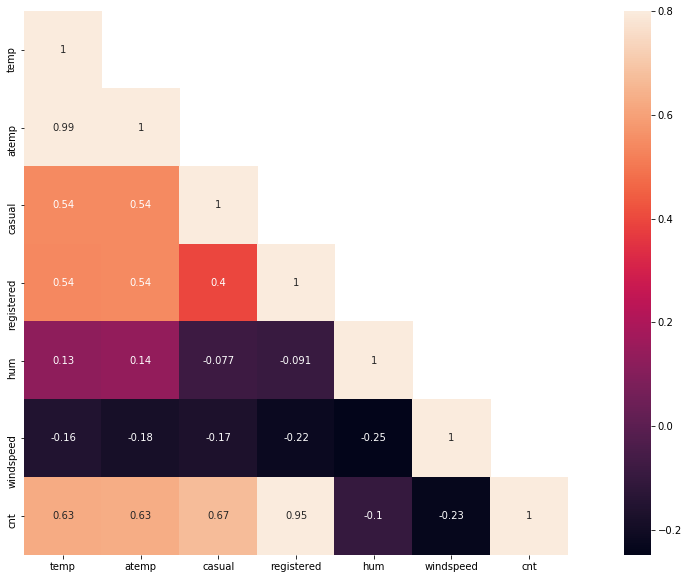

In [12]:
corrMatt = ddata[["temp","atemp","casual","registered","hum","windspeed","cnt"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

There is high correlation betwwen temp and atemp

Applying Logarithem to the target values to deal with skewness

In [101]:
ddata["logregister"] = ddata.apply(lambda row: math.log(row.registered), axis=1)
ddata["logcasual"] = ddata.apply(lambda row: math.log(row.casual), axis=1)

Changing the data types of the variable for feeding to the model

In [103]:
categoricalVar = ["season","holiday","workingday","weathersit","weekday","mnth","yr"]
numericalVar   = ["temp","hum","windspeed","atemp"]

In [104]:
for var in categoricalVar:
    ddata[var] = ddata[var].astype("category")

In [105]:
ddata.dtypes

instant           int64
dteday           object
season         category
yr             category
mnth           category
holiday        category
weekday        category
workingday     category
weathersit     category
temp            float64
atemp           float64
hum             float64
windspeed       float64
casual            int64
registered        int64
cnt               int64
logregister     float64
logcasual       float64
dtype: object

Dividing train and test data

In [106]:
X = ddata[['season', 'yr', 'mnth','holiday', 'weekday','workingday','weathersit','atemp','hum','windspeed']]
y = ddata[['logcasual','logregister']]

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Building Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression

In [110]:
lm = LinearRegression()

In [111]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
predictions = lm.predict(X_test)

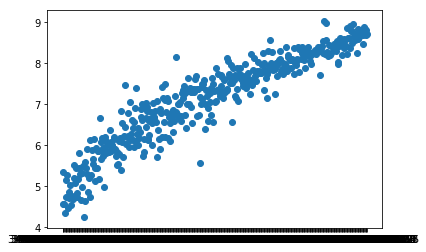

In [113]:
plt.scatter(y_test,predictions)

Evaluating the model

In [114]:
from sklearn import metrics

In [116]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.27713780555796014
MSE: 0.13975540174838139
RMSE: 0.37383873762410097


Building Random Forest Regression Model

In [118]:
from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor(n_estimators=250)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [119]:
rfc_pred = rfc.predict(X_test)

Evaluating the model

In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, rfc_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfc_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

MAE: 0.21425931357233904
MSE: 0.1113746233308456
RMSE: 0.33372836758484525


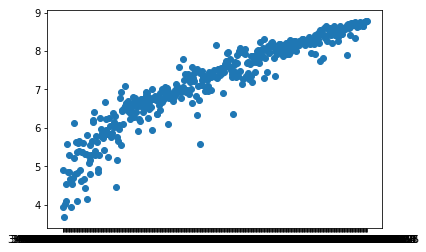

In [121]:
plt.scatter(y_test,rfc_pred)

Writing the Output Values to a file

In [122]:
submit = pd.DataFrame(predictions,columns=['logcasual','logregister'],dtype=float)
submit['casual'] = np.exp(submit['logcasual'])
submit['registered'] = np.exp(submit['logregister'])
submit.to_csv('FinalPythonFile.csv', index=False)